### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot 
%matplotlib inline
import numpy as np
import seaborn as sns
import spacy
from collections import Counter

from datetime import datetime

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
#choosing only the columns we will need
df=pd.read_excel("training_set_rel3.xlsx",usecols=['essay_id','essay_set','essay','domain1_score'])
df.head(10)

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0
5,6,1,"Dear @LOCATION1, I think that computers have a...",8.0
6,7,1,Did you know that more and more people these d...,10.0
7,8,1,@PERCENT1 of people agree that computers make ...,10.0
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",9.0
9,10,1,In the @LOCATION1 we have the technology of a ...,9.0


In [4]:
df['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [5]:
df.shape

(12978, 4)

In [6]:
df.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score'], dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=12978, step=1)

In [8]:
### Removing null values

df.isnull().sum()

essay_id         0
essay_set        0
essay            0
domain1_score    1
dtype: int64

In [9]:
df['essay'][6973]

"When they come back, Saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding; then I will take that test again. The author concludes this story Winter Hibiscus with this paragraph because in the story it's about Saeng and she fails her drivers test, and notice a familiar plant which causes her to go to a florist shop. As Saeng learns about this familian plant it encourages her to retake that drivers test, to where as though the snow is gone and the sun is shining.\t1\t1\t\t1\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t"

In [10]:
print("length before removing null values:",len(df))
df.dropna(inplace=True) 
print("length after removing null values:",len(df))

length before removing null values: 12978
length after removing null values: 12977


In [11]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12968, 12969, 12970, 12971, 12972, 12973, 12974, 12975, 12976,
            12977],
           dtype='int64', length=12977)

In [12]:
df.reset_index(inplace=True)

In [13]:
df.index

RangeIndex(start=0, stop=12977, step=1)

In [14]:
### there was just a single row
##Data lost in the process 
print((1/len(df))*100)

0.00770594128072744


In [15]:
### Duplicates
print("length before ",len(df))
df.drop_duplicates(inplace=True)
print("length after ",len(df))


length before  12977
length after  12977


<AxesSubplot:xlabel='essay_set', ylabel='count'>

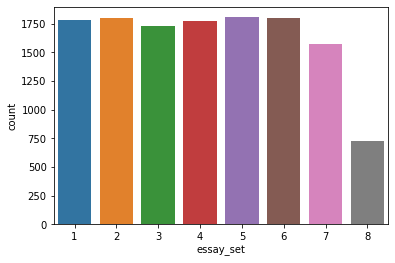

In [16]:
sns.countplot(df.essay_set)

### Now we try to clean the essay column(The meat of our dataset)

In [17]:
df2=df.copy()

In [18]:
df2.head()

,index,essay_id,essay_set,essay,domain1_score
0,0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


Factors we can consider:

1. grammatical errors

2. word count

3. no. of sentences

4. spelling mistakes

6. no. of nouns

7. adjectives

8. 

9. 

10. 

11. 


In [19]:
from gingerit.gingerit import GingerIt  ## *other options can be language_tool_python

In [20]:
parser=GingerIt()

In [21]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
text = 'Hello,m nam sheela.you doing fine?'
matches = tool.check(text)
#(matches)

In [22]:
## the matches returns the erros dictionary with all possible replacements too

In [23]:
##This lib seems to take longer time ## *have to calculate time

In [24]:
# the parse returns a dictionary where 'text' is our text, 'result' is the corrected string, 
#'corrections' is a list of dictionary of correction in which we get the start index of error in the string 
# with correct form and definition of why it was wrong

In [25]:
### We keep gingerIt as the library

#### Algorithm we use

1. slice the string so that the parser can count the errors (slicing at length 299)
2. sum the errors and add it to a column
3. rectify the original column so as to make sense of the statement
4. count the number of sentences

In [26]:
'''def splitting_strings(a_string):
    ''''The fcuntion splits the guven string into size of 299 and returns a list of the smaller strings''''
    print("here")
    split_strings = []
    n  = 299
    for index in range(0, len(a_string), n):
        split_strings.append(a_string[index : index + n])

    return split_strings'''

'def splitting_strings(a_string):\n    The fcuntion splits the guven string into size of 299 and returns a list of the smaller strings\n    print("here")\n    split_strings = []\n    n  = 299\n    for index in range(0, len(a_string), n):\n        split_strings.append(a_string[index : index + n])\n\n    return split_strings'

In [27]:
'''def grammer_mistakes(df):
    """
    This function takes the DataFrame as input and returns 
    3 lists containing the total no. of mistakes,
    corrected sentence and the number of sentences.
    """
    t0 = datetime.now()
    
    
    # go to every row and select essay column

    total=[]
    corrected=[]
    no_of_sentences=[]
    for ind in range(0,(len(df))):
        # text contains the entire essay
        text=df['essay'][ind] 
        
        no_of_sentences.append(len(text.split('.')))# this will contain the number of sentences
        
        strings=splitting_strings(text) # rather than making the splits at '.' we makeit according to the length as the free version of gingerIt supports only less than 300 characters
        ans_string=[]
        
        tot_mist=0
        print(ind ,len(strings))
        for i in range(0,len(strings)): ## go to every sentence
            s=strings[i]
            print("The split is for ",ind,' ',s)
            # using parse method to get mistakes in each sentence
            #print("the lengths ",len(s))
            
            mistakes=parser.parse(s)
            print(mistakes)
            #keeping a count of the number of mistakes in total
            tot_mist=tot_mist+len(mistakes['corrections'])
            # answer string contains the corrected sentence, corrected sentences can be used in future for sentiment analysis
            ans_string.append(mistakes['result']) 
        total.append(tot_mist)
        corrected.append(' '.join(ans_string))
        
        
    t1 = datetime.now()
    print('Processing time: {}'.format(t1 - t0)) 
        
    return total,corrected,no_of_sentences
'''

'def grammer_mistakes(df):\n    """\n    This function takes the DataFrame as input and returns \n    3 lists containing the total no. of mistakes,\n    corrected sentence and the number of sentences.\n    """\n    t0 = datetime.now()\n    \n    \n    # go to every row and select essay column\n\n    total=[]\n    corrected=[]\n    no_of_sentences=[]\n    for ind in range(0,(len(df))):\n        # text contains the entire essay\n        text=df[\'essay\'][ind] \n        \n        no_of_sentences.append(len(text.split(\'.\')))# this will contain the number of sentences\n        \n        strings=splitting_strings(text) # rather than making the splits at \'.\' we makeit according to the length as the free version of gingerIt supports only less than 300 characters\n        ans_string=[]\n        \n        tot_mist=0\n        print(ind ,len(strings))\n        for i in range(0,len(strings)): ## go to every sentence\n            s=strings[i]\n            print("The split is for ",ind,\' \',s)\

In [28]:
def splitting_strings(a_string):
    '''The fcuntion splits the guven string into size of 299 and returns a list of the smaller strings'''
    print("here")
    split_strings = []
    n  = 299
    for index in range(0, len(a_string), n):
        split_strings.append(a_string[index : index + n])

    return split_strings

In [29]:
def grammer_mistakes(df):
    """
    This function takes the DataFrame as input and returns 
    3 lists containing the total no. of mistakes,
    corrected sentence and the number of sentences.
    """
    t0 = datetime.now()
    
    
    # go to every row and select essay column

    total=[]
    no_of_sentences=[]
    for ind in range(0,(len(df))):
        # text contains the entire essay
        text=df['essay'][ind] 
        
        no_of_sentences.append(len(text.split('.')))# this will contain the number of sentences
        
        strings=text.split('.') # making the splits at '.' 
        ans_string=[]
        
        tot_mist=0
        print(ind ,len(strings))
        for i in range(0,len(strings)): ## go to every sentence
            s=strings[i]
            #print("The split is for ",ind,' ',s)
            # using parse method to get mistakes in each sentence
            #print("the lengths ",len(s))
            
            mistakes=tool.check(s)
            #print(mistakes)
            #keeping a count of the number of mistakes in total
            tot_mist=tot_mist+len(mistakes)
            # answer string contains the corrected sentence, corrected sentences can be used in future for sentiment analysis
             
        total.append(tot_mist)
        
        
        
    t1 = datetime.now()
    print('Processing time: {}'.format(t1 - t0)) 
        
    return total,no_of_sentences


In [30]:
total,no_of_sentences=grammer_mistakes(df2)

0 11
1 19
2 15
3 25
4 31
5 15
6 27
7 36
8 29
9 25
10 21
11 26
12 7
13 26
14 14
15 35
16 18
17 16
18 7
19 11
20 20
21 3
22 29
23 30
24 17
25 14
26 8
27 28
28 21
29 16
30 28
31 30
32 13
33 26
34 30
35 17
36 28
37 18
38 22
39 17
40 4
41 15
42 9
43 29
44 18
45 12
46 17
47 29
48 26
49 4
50 15
51 16
52 28
53 33
54 11
55 23
56 23
57 15
58 23
59 7
60 23
61 15
62 18
63 7
64 25
65 23
66 19
67 34
68 19
69 26
70 21
71 26
72 21
73 26
74 22
75 17
76 46
77 24
78 19
79 21
80 18
81 23
82 10
83 12
84 29
85 28
86 35
87 17
88 30
89 10
90 16
91 47
92 24
93 23
94 28


KeyboardInterrupt: 

In [31]:
df2['mistake_count']=total
df2['sentence_count']=no_of_sentences

NameError: name 'total' is not defined

In [40]:
df2.head()

,index,essay_id,essay_set,essay,domain1_score,mistake_count,sentence_count
0,0,1,1,"Dear local newspaper, I think effects computer...",8.0,15,11
1,1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,23,19
2,2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,17,15
3,3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,27,25
4,4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,17,31


In [ ]:
import pickle

In [43]:
df2.to_pickle('new_dataset.pickle')

In [47]:
df3=pd.read_pickle('new_dataset.pickle')
df3.head()
len(df3)


12977

### Actual dataset changes

t0 = datetime.now()

total,corrected,no_of_sentences=grammer_mistakes(df2)

t1 = datetime.now()
print('Processing time: {}'.format(t1 - t0))

df2['Total Mistakes']=total  
df2['Corrected String']=corrected
df2['sentence_count']=no_of_sentences